### Import Libraries

In [1]:
# standard python libraries for arrays and graphics
import numpy as np
import matplotlib.pyplot as plt 
# python library for finance 
import QuantLib as ql
# python class for Black-Scholes and Heston Models
from models import Black_Scholes_Model, Heston_Model
# python classes for closed-form formula of option prices
from analytical import euro_vanilla_call, barrier_call, euro_lookback_call
# python classes for various (exotic) options
from options import European_call_option, Asian_call_option
from options import Barrier_call_option, Lookback_European_call_option
import gPCA

## Pricing with Black-Sholes model

In [13]:
S0 = 100     # Inital stock price
T = 1        # Maturity time in year
m = 252      # Time periods until maturity (number of trading days in a year)
r = 0.05     # Interest rate
𝜎 = 0.15     # Volatility of the stock
K = 105      # Strike Price
up_H= 110
lo_H = 95

# instance of Black-Scholes Model
BS_model = Black_Scholes_Model(S0=S0, T=T, r=r, 𝜎=𝜎, m=m)


### European Call option

Alpha: 10
European Call option
True : 6.035564
QMC   : 5.996945  error: 0.302034
QCVNN : 6.036091  error: 0.013096
Relative error: 0.002169616064436404
------------------------------
Alpha: 11
European Call option
True : 6.035564
QMC   : 5.987889  error: 0.165682
QCVNN : 6.039632  error: 0.010581
Relative error: 0.001751927932032945
------------------------------
Alpha: 12
European Call option
True : 6.035564
QMC   : 6.102755  error: 0.171938
QCVNN : 6.03613  error: 0.0076
Relative error: 0.001259084877230941
------------------------------
Alpha: 13
European Call option
True : 6.035564
QMC   : 6.10241  error: 0.122818
QCVNN : 6.031393  error: 0.006472
Relative error: 0.001073052278304531
------------------------------
Alpha: 14
European Call option
True : 6.035564
QMC   : 6.003918  error: 0.069841
QCVNN : 6.037159  error: 0.00667
Relative error: 0.0011048243056046726
------------------------------
Alpha: 15
European Call option
True : 6.035564
QMC   : 6.028359  error: 0.057892
QCVNN : 

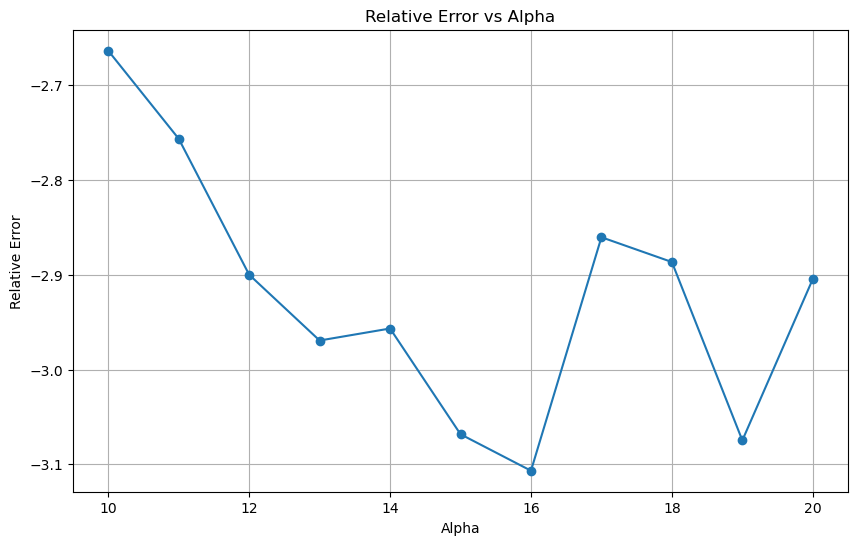

In [5]:
# alpha1 = 10
# alpha2 = 11
# # European call option
# euro_stock_option = European_call_option(model=BS_model, K=K)
# # True value
# call_true = euro_vanilla_call(S0=S0,K=K,T=T,r=r,𝜎=𝜎)
# print(call_true)
# # MC pricer
# mc, err_mc = euro_stock_option.MC_pricer(alpha = alpha1,seed=0,QMC_sample=False)
# # CVNN pricer
# mcnn, err_mcnn = euro_stock_option.CVNN_pricer(alpha1= alpha1,alpha2 = alpha2,seed=0,QMC_sample=False)
# print('European Call option')
# print('True :', np.round(call_true,6))
# print('MC   :', np.round(mc,8), ' error:', np.round(err_mc,6))
# print('CVNN :', np.round(mcnn,6), ' error:', np.round(err_mcnn,6))
# print('Relative error:',np.round(err_mcnn,6)/np.round(mcnn,6))


import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats.qmc import Sobol

# For gPCA
g = lambda x: np.max([S0*np.exp((r - 0.5*(𝜎)**2)*T + 𝜎*np.sqrt(T/m)*np.sum(x))-K,0])

# Initialize lists to store results
alpha1s = list(range(10,21))
alpha2 = 21
relative_errors = []
M = 20
# Loop over alpha values
for alpha in alpha1s:
    

    # European call option
    euro_stock_option = European_call_option(model=BS_model, K=K)
    
    # True value
    call_true = euro_vanilla_call(S0=S0,K=K,T=T,r=r,𝜎=𝜎)
    
    # MC pricer
    # mc, err_mc = euro_stock_option.MC_pricer(alpha=alpha,seed=0)
    qmc_values = np.array([euro_stock_option.MC_pricer(alpha=alpha, integrand=g ,seed=i,QMC_sample=False,GPCA=True)[0] for i in range(M)])
    err_qmc = np.sqrt(np.mean((qmc_values - call_true)**2))
    # CVNN pricer
    # mcnn, err_mcnn = euro_stock_option.CVNN_pricer(alpha1 = alpha,alpha2=alpha2,seed=0)
    qmcnn_values = np.array([euro_stock_option.CVNN_pricer(alpha1 = alpha,alpha2=alpha2, integrand=g,seed=i,QMC_sample=False,GPCA=True)[0] for i in range(M)])
    # print(qmcnn_values)
    err_qmcnn = np.sqrt(np.mean((qmcnn_values - call_true)**2))
    print('Alpha:', alpha)
    print('European Call option')
    print('True :', np.round(call_true,6))

    # print('MC   :', np.round(mc,8), ' error:', np.round(err_mc,6))
    # print('CVNN :', np.round(mcnn,6), ' error:', np.round(err_mcnn,6))
    print('QMC   :', np.round(np.mean(qmc_values),6), ' error:', np.round(err_qmc,6))
    print('QCVNN :', np.round(np.mean(qmcnn_values),6), ' error:', np.round(err_qmcnn,6))
    rel_error = np.round(err_qmcnn,6)/np.round(np.mean(qmcnn_values),6)
    print('Relative error:', rel_error)
    print('---'*10)
    
    # Store relative error for current alpha value
    relative_errors.append(rel_error)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(alpha1s, np.log10(relative_errors), '-o')
plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Alpha')
plt.grid(True)
plt.show()


Alpha: 10
European Call option
True : 6.035564
QMC   : 6.036479  error: 0.005139
QCVNN : 6.041493  error: 0.010723
Relative error: 0.0017748923982863177
------------------------------
Alpha: 11
European Call option
True : 6.035564
QMC   : 6.035485  error: 0.003054
QCVNN : 6.040951  error: 0.00683
Relative error: 0.0011306166860151656
------------------------------
Alpha: 12
European Call option
True : 6.035564
QMC   : 6.036478  error: 0.002446
QCVNN : 6.03758  error: 0.002874
Relative error: 0.00047601853722849214
------------------------------
Alpha: 13
European Call option
True : 6.035564
QMC   : 6.035564  error: 0.000491
QCVNN : 6.03613  error: 0.000995
Relative error: 0.00016484071747957713
------------------------------
Alpha: 14
European Call option
True : 6.035564
QMC   : 6.035593  error: 0.000485
QCVNN : 6.036064  error: 0.000682
Relative error: 0.0001129875362487873
------------------------------
Alpha: 15
European Call option
True : 6.035564
QMC   : 6.035572  error: 0.000192


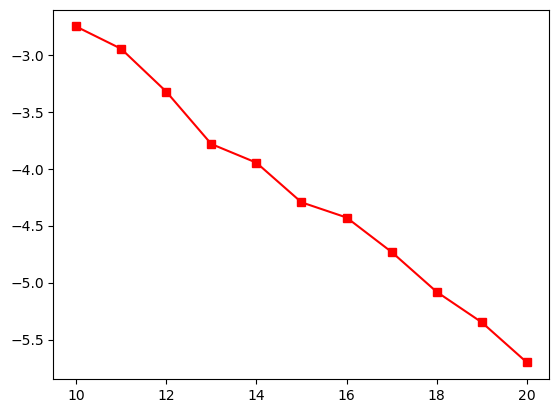

In [5]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats.qmc import Sobol

# Initialize lists to store results
alpha1s = list(range(10,21))
alpha2 = 21
relative_errors = []
M = 20
# Loop over alpha values
another_relative_errors = []
for alpha in alpha1s:
    
    # European call option
    euro_stock_option = European_call_option(model=BS_model, K=K)
    
    # True value
    call_true = euro_vanilla_call(S0=S0,K=K,T=T,r=r,𝜎=𝜎)
    # MC pricer
    # mc, err_mc = euro_stock_option.MC_pricer(alpha=alpha,seed=0)
    qmc_values1 = np.array([euro_stock_option.MC_pricer(alpha=alpha, integrand=g ,seed=0,QMC_sample=True,GPCA=True)[0] for i in range(M)])
    err_qmc1 = np.sqrt(np.mean((qmc_values1 - call_true)**2))
    # CVNN pricer
    # mcnn, err_mcnn = euro_stock_option.CVNN_pricer(alpha1 = alpha,alpha2=alpha2,seed=0)
    qmcnn_values1 = np.array([euro_stock_option.CVNN_pricer(alpha1 = alpha,alpha2=alpha2,integrand=g, seed=0,QMC_sample=True,GPCA=True)[0] for i in range(M)])
    # print(qmcnn_values)
    err_qmcnn1 = np.sqrt(np.mean((qmcnn_values1 - call_true)**2))
    print('Alpha:', alpha)
    print('European Call option')
    print('True :', np.round(call_true,6))

    # print('MC   :', np.round(mc,8), ' error:', np.round(err_mc,6))
    # print('CVNN :', np.round(mcnn,6), ' error:', np.round(err_mcnn,6))
    print('QMC   :', np.round(np.mean(qmc_values1),6), ' error:', np.round(err_qmc1,6))
    print('QCVNN :', np.round(np.mean(qmcnn_values1),6), ' error:', np.round(err_qmcnn1,6))
    rel_error1 = np.round(err_qmcnn1,6)/np.round(np.mean(qmcnn_values1),6)
    print('Relative error:', rel_error1)
    print('---'*10)
    
    # Store relative error for current alpha value
    another_relative_errors.append(rel_error1)

plt.plot(alpha1s, np.log10(another_relative_errors), '-s', label='Error 2', color='red')

### Asian Call option

In [2]:
S0 = 100     # Inital stock price
T = 7/365    # Maturity time in year
m = 100      # Time periods until maturity (number of trading days in a year)
r = 0.05     # Interest rate
𝜎 = 0.3     # Volatility of the stock
K = 105      # Strike Price
up_H= 110
lo_H = 95

g = lambda x: np.max([S0*np.exp((r - 0.5*(𝜎)**2)*T + 𝜎*np.sqrt(T/m)*np.sum(x))-K,0])
g_A = lambda x: np.max(S0*np.mean([np.exp((r - 0.5*(𝜎)**2)*T/m + 𝜎*np.sqrt(T/m)*np.sum(x[0:j])) for j in range(1,m)]) - K,0)
g_G = lambda x: np.max(S0*np.exp(np.mean(np.log([np.exp((r - 0.5*(𝜎)**2)*T/m + 𝜎*np.sqrt(T/m)*np.sum(x[0:j])) for j in range(1,m)]))) - K,0)

Alpha: 8
European Call option
True : 0.021689
MC   : 0.033103  error: 0.011414
CVMC   : 0.021562  error: 0.000127
CVNN : 0.020317  error: 0.001372
Relative error: 0.06752965496874538
------------------------------
Alpha: 9
European Call option
True : 0.021689
MC   : 0.027584  error: 0.005895
CVMC   : 0.021741  error: 5.2e-05
CVNN : 0.020594  error: 0.001095
Relative error: 0.05317082645430708
------------------------------
Alpha: 10
European Call option
True : 0.021689
MC   : 0.024713  error: 0.003024
CVMC   : 0.021705  error: 1.6e-05
CVNN : 0.020736  error: 0.000952
Relative error: 0.045910493827160496
------------------------------
Alpha: 11
European Call option
True : 0.021689
MC   : 0.028198  error: 0.006509
CVMC   : 0.021664  error: 2.5e-05
CVNN : 0.022147  error: 0.000458
Relative error: 0.020680001806113697
------------------------------
Alpha: 12
European Call option
True : 0.021689
MC   : 0.02389  error: 0.002201
CVMC   : 0.021646  error: 4.2e-05
CVNN : 0.021651  error: 3.8e-0

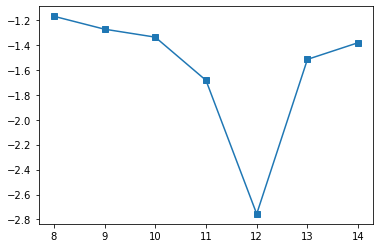

In [5]:


# instance of Black-Scholes Model
BS_model = Black_Scholes_Model(S0=S0, T=T, r=r, 𝜎=𝜎, m=m)
# Asian Call option
asian_stock_option = Asian_call_option(model=BS_model,K=K)

alpha1s = list(range(8,15))
alpha2 = 15
M = 20
Asian_relative_errors = []


# True value by CVMonte Carlo approximation with large sample size
call_true, _ = asian_stock_option.CV_pricer(alpha=15, integrand=g_A, seed=0, QMC_sample=True, GPCA=False)

for alpha1 in alpha1s:
    # MC estimate
    mc = np.array([asian_stock_option.MC_pricer(alpha=alpha1, integrand=g_A, seed=0, QMC_sample=False, GPCA=False)[0] for i in range(M)])
    # Geo Avg Control variate
    # CVMC estimate
    cvmc = np.array([asian_stock_option.CV_pricer(alpha=alpha1, integrand=g_A, seed=0, QMC_sample=False, GPCA=False)[0] for i in range(M)])
    # CVNN estimate
    mcnn = np.array([asian_stock_option.CVNN_pricer(alpha1=alpha1, alpha2 = alpha2 , integrand=g_A, seed=0, QMC_sample=False, GPCA=False)[0] for i in range(M)])

    err_mc = np.sqrt(np.mean((mc - call_true)**2))
    err_cvmc = np.sqrt(np.mean((cvmc - call_true)**2))
    err_mcnn = np.sqrt(np.mean((mcnn - call_true)**2))


    print('Alpha:', alpha1)
    print('European Call option')
    print('True :', np.round(call_true,6))
    print('MC   :', np.round(np.mean(mc),6), ' error:', np.round(err_mc,6))
    print('CVMC   :', np.round(np.mean(cvmc),6), ' error:', np.round(err_cvmc,6))
    print('CVNN :', np.round(np.mean(mcnn),6), ' error:', np.round(err_mcnn,6))
    rel_error2 = np.round(err_mcnn,6)/np.round(np.mean(mcnn),6)
    print('Relative error:', rel_error2)
    print('---'*10)
    
    # Store relative error for current alpha value
    Asian_relative_errors.append(rel_error2)

plt.plot(alpha1s, np.log10(Asian_relative_errors), '-s', label='Error 2')

### 需要算力

In [ ]:


# instance of Black-Scholes Model
BS_model = Black_Scholes_Model(S0=S0, T=T, r=r, 𝜎=𝜎, m=m)
# Asian Call option
asian_stock_option = Asian_call_option(model=BS_model,K=K)

alpha1s = list(range(8,15))
alpha2 = 15
M = 20
Asian_another_relative_errors = []


# True value by CVMonte Carlo approximation with large sample size
call_true, _ = asian_stock_option.CV_pricer(alpha=15, integrand=g_A, seed=0, QMC_sample=True, GPCA=False)

for alpha1 in alpha1s:
    # MC estimate
    mc = np.array([asian_stock_option.MC_pricer(alpha=alpha1, integrand=g_A, seed=0, QMC_sample=True, GPCA=True)[0] for i in range(M)])
    # Geo Avg Control variate
    # CVMC estimate
    cvmc = np.array([asian_stock_option.CV_pricer(alpha=alpha1, integrand=g_A, seed=0, QMC_sample=True, GPCA=True)[0] for i in range(M)])
    # CVNN estimate
    mcnn = np.array([asian_stock_option.CVNN_pricer(alpha1=alpha1, alpha2 = alpha2 , integrand=g_A, seed=0, QMC_sample=True, GPCA=True)[0] for i in range(M)])

    err_mc = np.sqrt(np.mean((mc - call_true)**2))
    err_cvmc = np.sqrt(np.mean((cvmc - call_true)**2))
    err_mcnn = np.sqrt(np.mean((mcnn - call_true)**2))


    print('Alpha:', alpha1)
    print('European Call option')
    print('True :', np.round(call_true,6))
    print('MC   :', np.round(np.mean(mc),6), ' error:', np.round(err_mc,6))
    print('CVMC   :', np.round(np.mean(cvmc),6), ' error:', np.round(err_cvmc,6))
    print('CVNN :', np.round(np.mean(mcnn),6), ' error:', np.round(err_mcnn,6))
    rel_error3 = np.round(err_mcnn,6)/np.round(np.mean(mcnn),6)
    print('Relative error:', rel_error2)
    print('---'*10)
    
    # Store relative error for current alpha value
    Asian_another_relative_errors.append(rel_error3)

plt.plot(alpha1s, np.log10(Asian_another_relative_errors), '-s', label='Error 2')